<a href="https://colab.research.google.com/github/hongwon2/Python-Practice/blob/main/%EC%82%AC%EA%B8%B0%EA%B5%AC%EB%A7%A4%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석

/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석


In [ ]:
import pandas as pd
data = pd.read_csv('Fraud_Data.csv')

In [ ]:
data.shape

(151112, 11)

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
ip = pd.read_csv('IpAddress_to_Country.csv')

In [ ]:
ip.shape

(138846, 3)

In [ ]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [ ]:
print('Fraud% : ',len(data[data['class']==1])/len(data)*100,'%')

Fraud% :  9.364577267192546 %


In [ ]:
data.signup_time.nunique()

151112

In [ ]:
print('min_signup : ',min(data.signup_time))
print('max_signup : ',max(data.signup_time))
print('min_purchase : ',min(data.purchase_time))
print('max_purchase : ',max(data.purchase_time))

min_signup :  2015-01-01 00:00:42
max_signup :  2015-08-18 04:40:29
min_purchase :  2015-01-01 00:00:44
max_purchase :  2015-12-16 02:56:05


In [ ]:
#데이터 병합
data['p_mth'] = pd.to_datetime(data['purchase_time']).dt.month
data['s_mth'] = pd.to_datetime(data['signup_time']).dt.month

In [ ]:
data['s_week'] = pd.to_datetime(data['signup_time']).dt.isocalendar().week #isocalendar() : datetime의 연도,연도의 몇번째 주차인지,주차의 몇번째 날짜인지 알려줌
data['p_week'] = pd.to_datetime(data['purchase_time']).dt.isocalendar().week

In [ ]:
data['s_day'] = pd.to_datetime(data['signup_time']).dt.dayofweek #daypfweek : 일요일 : 1 ~ 토요일 : 7
data['p_day'] = pd.to_datetime(data['purchase_time']).dt.dayofweek

In [ ]:
data['dt'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype('timedelta64[D]') #넘파이 날짜형 D- 일 까지 다 보여줌

In [ ]:
device_count=data[['user_id','device_id']].groupby('device_id').count().reset_index()

In [ ]:
device_count = device_count.rename(columns = {'user_id':'d_ct'})

In [ ]:
data = data.merge(device_count,how = 'left',on = 'device_id')

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1


In [ ]:
ip_count = data[['user_id','ip_address']].groupby('ip_address').count().reset_index()
ip_count = ip_count.rename(columns = {'user_id':'ip_ct'})
data = data.merge(ip_count,how = 'left',on = 'ip_address')

In [ ]:
countries = []
for i in range(len(data)):
  ip_address = data.loc[i,'ip_address']
  tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) & (ip['upper_bound_ip_address'] >= ip_address)]
  if len(tmp) == 1:
    countries.append(tmp['country'].values[0])
  else :
    countries.append('NA')
data['country'] = countries

In [ ]:
pd.set_option('max_columns',25)

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct,ip_ct,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1,1,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1,1,United States


In [ ]:
df = data[['purchase_value','source','browser','sex','age','p_mth','s_mth','s_week','p_week','s_day','p_day','dt','d_ct','ip_ct','country','d_ct','class']]

In [ ]:
df.head()

,purchase_value,source,browser,sex,age,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct,ip_ct,country,d_ct,class
0,34,SEO,Chrome,M,39,4,2,9,16,1,5,52.0,1,1,Japan,1,0
1,16,Ads,Chrome,F,53,6,6,23,24,6,0,0.0,1,1,United States,1,0
2,15,SEO,Opera,M,53,1,1,1,1,3,3,0.0,12,12,United States,12,1
3,44,SEO,Safari,M,41,5,4,18,19,1,0,5.0,1,1,NA,1,0
4,39,Ads,Safari,M,45,9,7,30,37,1,2,50.0,1,1,United States,1,0


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석/output.csv'

with open(path,'w',encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install pycaret -q

     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 1.7 MB 52.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 49.6 MB/s 
     |████████████████████████████████| 2.0 MB 50.2 MB/s 
     |████████████████████████████████| 120 kB 58.7 MB/s 
     |████████████████████████████████| 167 kB 51.0 MB/s 
     |████████████████████████████████| 1.3 MB 53.2 MB/s 
     |████████████████████████████████| 17.8 MB 633 kB/s 
     |████████████████████████████████| 6.8 MB 53.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 42.5 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 4.7 MB 40.6 MB/s 
     |██████████████████

In [ ]:
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
data = pd.read_csv('output.csv')

In [ ]:
data.shape

(151112, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   source          151112 non-null  object 
 3   browser         151112 non-null  object 
 4   sex             151112 non-null  object 
 5   age             151112 non-null  int64  
 6   p_mth           151112 non-null  int64  
 7   s_mth           151112 non-null  int64  
 8   s_week          151112 non-null  int64  
 9   p_week          151112 non-null  int64  
 10  s_day           151112 non-null  int64  
 11  p_day           151112 non-null  int64  
 12  dt              151112 non-null  float64
 13  d_ct            151112 non-null  int64  
 14  ip_ct           151112 non-null  int64  
 15  country         129146 non-null  object 
 16  d_ct.1          151112 non-null  int64  
 17  class     

In [ ]:
exp = setup(data,silent=True,target = 'class')

,Description,Value
0,session_id,8446
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(151112, 18)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top3 = compare_models(sort='Accuracy',n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9565,0.8441,0.5400,0.9962,0.7001,0.6789,0.7162,44.837
rf,Random Forest Classifier,0.9564,0.8460,0.5407,0.9939,0.7002,0.6789,0.7157,30.104
lightgbm,Light Gradient Boosting Machine,0.9564,0.8459,0.5415,0.9925,0.7005,0.6792,0.7157,1.429
ada,Ada Boost Classifier,0.9548,0.8463,0.5428,0.9588,0.6930,0.6706,0.7024,11.102
et,Extra Trees Classifier,0.9547,0.8433,0.5451,0.9535,0.6935,0.6710,0.7018,45.324
knn,K Neighbors Classifier,0.9540,0.7720,0.5407,0.9494,0.6889,0.6661,0.6970,12.543
ridge,Ridge Classifier,0.9522,0.0000,0.5426,0.9160,0.6814,0.6574,0.6839,0.455
lr,Logistic Regression,0.9521,0.8433,0.5452,0.9108,0.6819,0.6578,0.6833,51.432
lda,Linear Discriminant Analysis,0.9518,0.8427,0.5443,0.9069,0.6802,0.6559,0.6810,7.544
svm,SVM - Linear Kernel,0.9494,0.0000,0.5607,0.8750,0.6772,0.6513,0.6737,12.043


In [ ]:
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9531,0.8271,0.5030,0.9980,0.6689,0.6466,0.6908
1,0.9549,0.8343,0.5211,1.0000,0.6851,0.6634,0.7045
2,0.9591,0.8641,0.5663,0.9982,0.7226,0.7023,0.7353
3,0.9580,0.8321,0.5542,1.0000,0.7132,0.6925,0.7278
4,0.9554,0.8544,0.5261,1.0000,0.6895,0.6679,0.7081
5,0.9576,0.8494,0.5502,0.9982,0.7094,0.6885,0.7242
6,0.9573,0.8521,0.5472,0.9982,0.7069,0.6859,0.7221
7,0.9573,0.8520,0.5462,1.0000,0.7065,0.6856,0.7222
8,0.9573,0.8429,0.5482,0.9964,0.7073,0.6863,0.7221


In [ ]:
blender_top3 = blend_models(estimator_list=tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9531,0.8246,0.5030,0.9980,0.6689,0.6466,0.6908
1,0.9549,0.8333,0.5211,1.0000,0.6851,0.6634,0.7045
2,0.9591,0.8646,0.5663,0.9982,0.7226,0.7023,0.7353
3,0.9580,0.8455,0.5542,1.0000,0.7132,0.6925,0.7278
4,0.9554,0.8541,0.5261,1.0000,0.6895,0.6679,0.7081
5,0.9576,0.8507,0.5502,0.9982,0.7094,0.6885,0.7242
6,0.9573,0.8497,0.5472,0.9982,0.7069,0.6859,0.7221
7,0.9573,0.8470,0.5462,1.0000,0.7065,0.6856,0.7222
8,0.9574,0.8405,0.5482,0.9982,0.7077,0.6868,0.7228


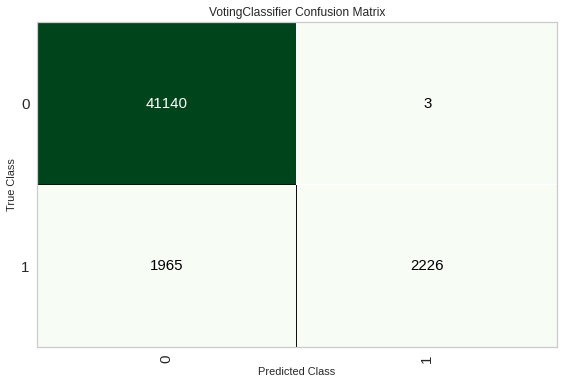

In [ ]:
plot_model(blender_top3, plot = 'confusion_matrix')

In [1]:
# create a custom function
def calculate_profit(y, y_pred):
  tp = np.where((y_pred==1) & (y==1), (36.99-8), 0)
  fp = np.where((y_pred==1) & (y==0), -8, 0)
  fn = np.where((y_pred==0) & (y==1), -36.99, 0)
  return np.sum([tp,fp,fn])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

NameError: ignored

In [ ]:
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
gbc,Gradient Boosting Classifier,0.9565,0.8441,0.5400,0.9962,0.7001,0.6789,0.7162,-16994.103,45.707
lightgbm,Light Gradient Boosting Machine,0.9564,0.8459,0.5415,0.9925,0.7005,0.6792,0.7157,-17012.388,1.447
rf,Random Forest Classifier,0.9564,0.8460,0.5407,0.9939,0.7002,0.6789,0.7157,-17012.484,31.332
ada,Ada Boost Classifier,0.9548,0.8463,0.5428,0.9588,0.6930,0.6706,0.7024,-17669.586,10.194
et,Extra Trees Classifier,0.9547,0.8433,0.5451,0.9535,0.6935,0.6710,0.7018,-17702.547,48.242
knn,K Neighbors Classifier,0.9540,0.7720,0.5407,0.9494,0.6889,0.6661,0.6970,-17946.813,13.313
ridge,Ridge Classifier,0.9522,0.0000,0.5426,0.9160,0.6814,0.6574,0.6839,-18648.255,0.462
lr,Logistic Regression,0.9521,0.8433,0.5452,0.9108,0.6819,0.6578,0.6833,-18688.566,50.982
lda,Linear Discriminant Analysis,0.9518,0.8427,0.5443,0.9069,0.6802,0.6559,0.6810,-18810.543,7.639
svm,SVM - Linear Kernel,0.9494,0.0000,0.5607,0.8750,0.6772,0.6513,0.6737,-19750.290,12.621


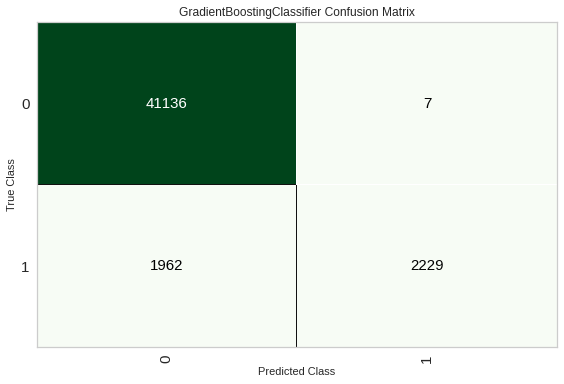

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')